<a href="https://colab.research.google.com/github/NHagar/cc-genealogy/blob/main/analysis/cc_genalogy_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datasets and Paths

In [2]:
from pathlib import Path
query_path = Path("queries/domains")

paths = {
    "c4_en": ("hf://datasets/allenai/c4/en/*.json.gz", query_path / "c4_en.sql"),
    "c4_en_noblock": (
        "hf://datasets/allenai/c4/en.noblocklist/*.json.gz",
        query_path / "c4_en_noblocklist.sql",
    ),
    "c4_multilingual": (
        "hf://datasets/allenai/c4/multilingual/*.json.gz",
        query_path / "c4_multilingual.sql",
    ),
    "c4_news": (
        "hf://datasets/allenai/c4/realnewslike/*.json.gz",
        query_path / "c4_realnewslike.sql",
    ),
    "cultura": (
        "hf://datasets/uonlp/CulturaX/*/*.parquet",
        query_path / "culturax.sql",
    ),
    "falcon": (
        "hf://datasets/tiiuae/falcon-refinedweb/data/*.parquet",
        query_path / "falcon_refinedweb.sql",
    ),
    "fineweb": (
        "hf://datasets/HuggingFaceFW/fineweb/data/*/*.parquet",
        query_path / "fineweb.sql",
    ),
    "fineweb_edu": (
        "hf://datasets/HuggingFaceFW/fineweb-edu/data/*/*.parquet",
        query_path / "fineweb_edu.sql",
    ),
    "madlad_cleaned": (
        "hf://datasets/allenai/MADLAD-400/data-v1p5/*/clean*.jsonl.gz",
        query_path / "madlad_400_cleaned.sql",
    ),
    "madlad_noisy": (
        "hf://datasets/allenai/MADLAD-400/data-v1p5/*/noisy*.jsonl.gz",
        query_path / "madlad_400_raw.sql",
    ),
    "zyda_2": (
        "hf://datasets/Zyphra/Zyda-2/data/**/*.parquet",
        query_path / "zyda_2.sql",
    ),
    "dclm": (
        "hf://datasets/mlfoundations/dclm-baseline-1.0-parquet/filtered/**/*.parquet",
        query_path / "dclm_baseline.sql",
    ),
}

In [4]:
list(paths.keys())

['c4_en',
 'c4_en_noblock',
 'c4_multilingual',
 'c4_news',
 'cultura',
 'falcon',
 'fineweb',
 'fineweb_edu',
 'madlad_cleaned',
 'madlad_noisy',
 'zyda_2',
 'dclm']

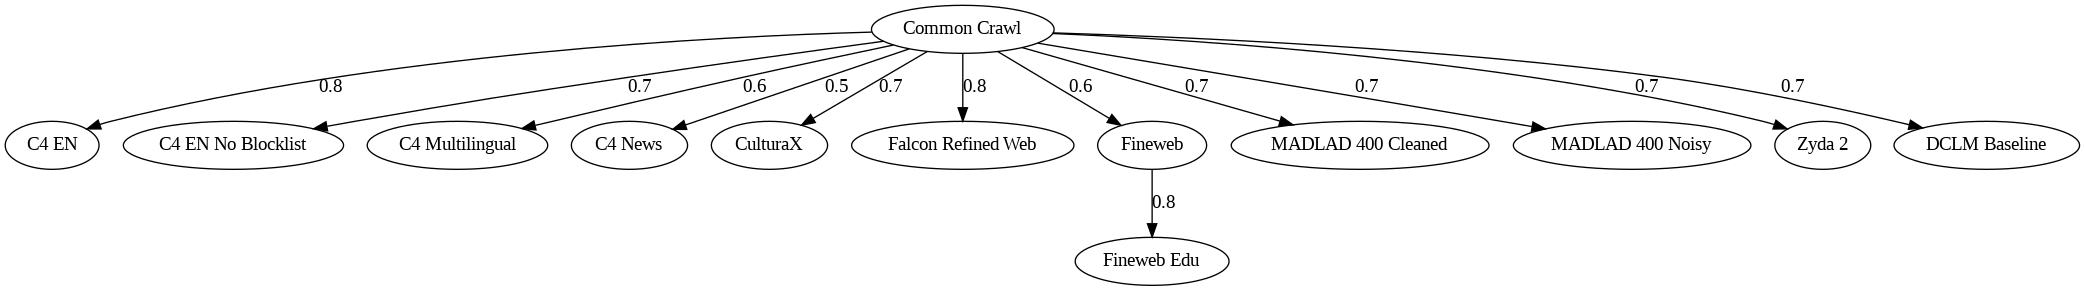

In [10]:
from graphviz import Digraph
from IPython.display import Image

# blank directed graph
dot = Digraph(comment='Common Crawl Tree')
dot.attr(rankdir='TB')  # Top to bottom layout

# nodes
dot.node('common-crawl', 'Common Crawl')
dot.node('c4-en', 'C4 EN')
dot.node('c4-en-noblock', 'C4 EN No Blocklist')
dot.node('c4-multilingual', 'C4 Multilingual')
dot.node('c4-news', 'C4 News')
dot.node('cultura', 'CulturaX')
dot.node('falcon', 'Falcon Refined Web')
dot.node('fineweb', 'Fineweb')
dot.node('fineweb-edu', 'Fineweb Edu')
dot.node('madlad-cleaned', 'MADLAD 400 Cleaned')
dot.node('madlad-noisy', 'MADLAD 400 Noisy')
dot.node('zyda-2', 'Zyda 2')
dot.node('dclm', 'DCLM Baseline')

# edges with random weights
dot.edge('common-crawl', 'c4-en', label='0.8')
dot.edge('common-crawl', 'c4-en-noblock', label='0.7')
dot.edge('common-crawl', 'c4-multilingual', label='0.6')
dot.edge('common-crawl', 'c4-news', label='0.5')
dot.edge('common-crawl', 'cultura', label='0.7')
dot.edge('common-crawl', 'falcon', label='0.8')
dot.edge('common-crawl', 'fineweb', label='0.6')
dot.edge('fineweb', 'fineweb-edu', label='0.8')
dot.edge('common-crawl', 'madlad-cleaned', label='0.7')
dot.edge('common-crawl', 'madlad-noisy', label='0.7')
dot.edge('common-crawl', 'zyda-2', label='0.7')
dot.edge('common-crawl', 'dclm', label='0.7')

# view the graph
#dot.render('common_crawl_tree', format='png', view=True)
Image(dot.pipe(format='png'))

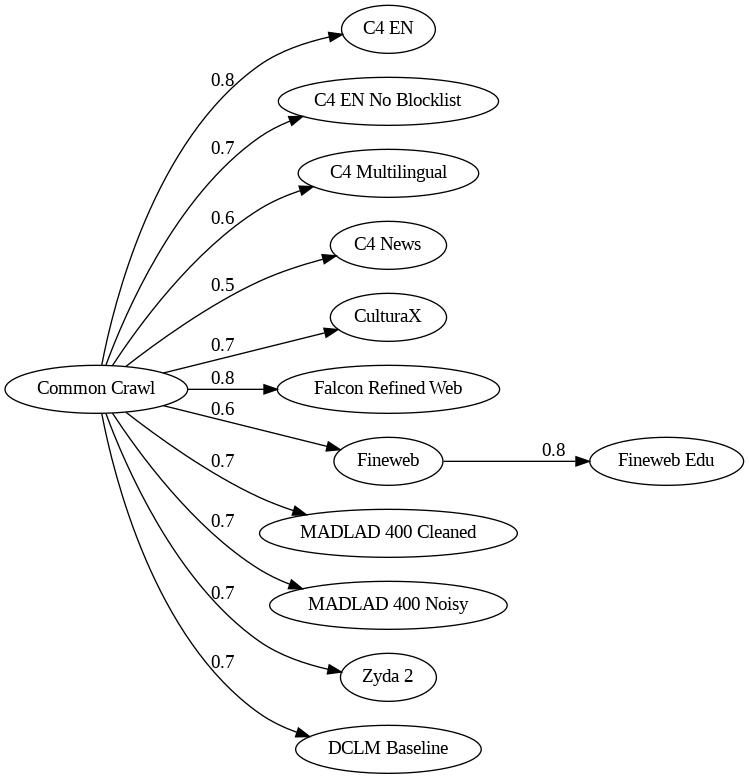

In [14]:
from graphviz import Digraph
from IPython.display import Image

# Create a new directed graph
dot = Digraph(comment='Common Crawl Tree')
dot.attr(rankdir='LR') # Left to right layout

# Define subgraphs for vertical positioning
with dot.subgraph() as s1:
    s1.attr(rank='top')
    s1.node('common-crawl', 'Common Crawl')

with dot.subgraph() as s2:
    s2.attr(rank='same')
    s2.node('c4-en', 'C4 EN')
    s2.node('c4-en-noblock', 'C4 EN No Blocklist')
    s2.node('c4-multilingual', 'C4 Multilingual')
    s2.node('c4-news', 'C4 News')

with dot.subgraph() as s3:
    s3.attr(rank='same')
    s3.node('cultura', 'CulturaX')
    s3.node('falcon', 'Falcon Refined Web')
    s3.node('fineweb', 'Fineweb')

with dot.subgraph() as s4:
    s4.attr(rank='same')
    s4.node('fineweb-edu', 'Fineweb Edu')

with dot.subgraph() as s5:
    s5.attr(rank='bottom')
    s5.node('madlad-cleaned', 'MADLAD 400 Cleaned')
    s5.node('madlad-noisy', 'MADLAD 400 Noisy')
    s5.node('zyda-2', 'Zyda 2')
    s5.node('dclm', 'DCLM Baseline')

# Add edges with weights as labels (if desired)
dot.edge('common-crawl', 'c4-en', label='0.8')
dot.edge('common-crawl', 'c4-en-noblock', label='0.7')
dot.edge('common-crawl', 'c4-multilingual', label='0.6')
dot.edge('common-crawl', 'c4-news', label='0.5')
dot.edge('common-crawl', 'cultura', label='0.7')
dot.edge('common-crawl', 'falcon', label='0.8')
dot.edge('common-crawl', 'fineweb', label='0.6')
dot.edge('fineweb', 'fineweb-edu', label='0.8')
dot.edge('common-crawl', 'madlad-cleaned', label='0.7')
dot.edge('common-crawl', 'madlad-noisy', label='0.7')
dot.edge('common-crawl', 'zyda-2', label='0.7')
dot.edge('common-crawl', 'dclm', label='0.7')

# Render and display the graph in the notebook
Image(dot.pipe(format='png'))